<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/007_Toy_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Objectif

 * Construire un mini modèle Resnet et l'entraîner sur les données CIFAR10 disponble dans le module datasets de keras
 * **Input Image** : 32,32,3

 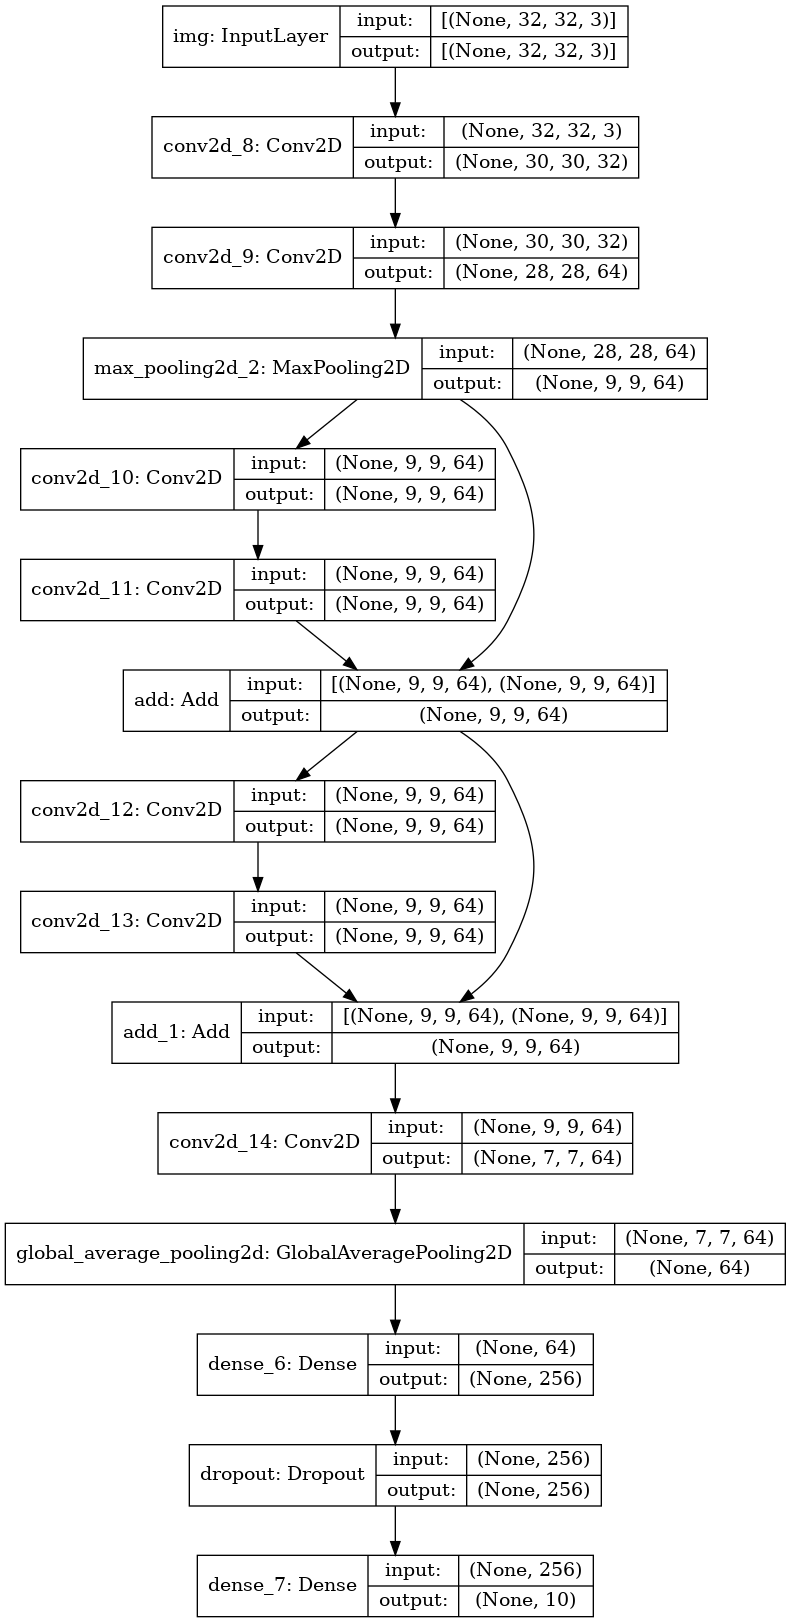

In [21]:
# Parameters
input_shape = (32,32,3)

In [22]:
# Architecture
input_image = tf.keras.layers.Input(shape=input_shape,name = "input_layer")
x = tf.keras.layers.Convolution2D(filters = 32, kernel_size = 3,name = "conv1",activation="relu")(input_image)
x = tf.keras.layers.Convolution2D(filters=64,kernel_size = 3, name = "conv2",activation="relu")(x)
maxpool1 = tf.keras.layers.MaxPooling2D(strides = 3, name = "maxpool1")(x)
conv3 = tf.keras.layers.Convolution2D(filters = 64, kernel_size = 3, name = "conv3", activation="relu", padding="same")(maxpool1)
conv4 = tf.keras.layers.Convolution2D(filters = 64, kernel_size= 3 , name = "conv4", activation="relu", padding="same")(conv3)
add1 = tf.keras.layers.Add(name="add1")([maxpool1,conv4])
conv5 = tf.keras.layers.Convolution2D(filters = 64, kernel_size = 3, name = "conv5", activation="relu", padding="same")(add1)
conv6 = tf.keras.layers.Convolution2D(filters = 64, kernel_size=3, name = "conv6", activation="relu", padding="same")(conv5)
add2 = tf.keras.layers.Add(name="add2")([add1,conv6])
x = tf.keras.layers.Convolution2D(filters = 64, kernel_size=3, name = "conv7", activation="relu")(add2)
x = tf.keras.layers.GlobalAveragePooling2D(name="GAP2d")(x)
x = tf.keras.layers.Dense(units=256, name = "dense1",activation="relu")(x)
x = tf.keras.layers.Dropout(rate = 0.5, name = "dropout")(x)
x = tf.keras.layers.Dense(units = 10, name = "dense2")(x)

In [35]:
# Instanciation du model
model = tf.keras.Model(inputs = input_image, outputs = x, name = "toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 30, 30, 32)   896         ['input_layer[0][0]']            
                                                                                                  
 conv2 (Conv2D)                 (None, 28, 28, 64)   18496       ['conv1[0][0]']                  
                                                                                                  
 maxpool1 (MaxPooling2D)        (None, 9, 9, 64)     0           ['conv2[0][0]']                  
                                                                                         

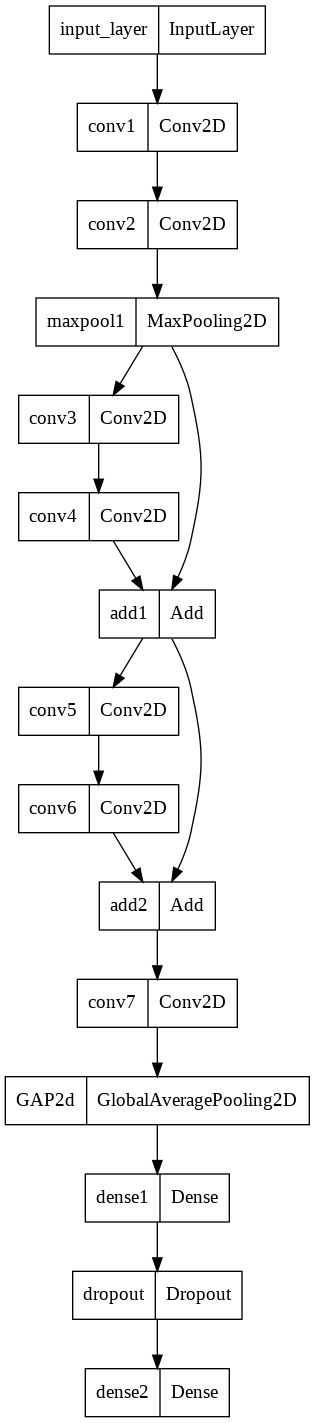

In [36]:
tf.keras.utils.plot_model(model)

In [37]:
# Récupération des données
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [40]:
# Preprocessing
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [41]:
# Compilation du modele
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)

In [ ]:
# Training
model.fit(x=x_train,y=y_train,validation_split = 0.2,batch_size=64,epochs = 5)

Epoch 1/5
363/625 [================>.............] - ETA: 1:28 - loss: 2.0246 - acc: 0.2351